In [1]:
import matplotlib.pyplot as plt
import numpy as np

from rocketpy import Environment, Flight, EmptyMotor, Rocket

In [2]:
env = Environment(
    latitude=32.939377,
    longitude=-106.911986,
    elevation=1401,
)

launchpad_pressure_hyp1 = 86368 # Pa
launchpad_temp_hyp1 = 25.8 + 273.15 # K
lapse_rate_SAC = -0.00817

TEMP_SEA_LEVEL = launchpad_temp_hyp1 + lapse_rate_SAC * 1401
def temp_at_h_ASL(h):
    return launchpad_temp_hyp1 + lapse_rate_SAC * (h - 1401)

R_universal = 8.3144598
MM_air = 0.0289644
R_AIR = R_universal / MM_air
def get_local_gravity(latitude, h = 0):
    """
    Calculate the acceleration due to gravity at a given latitude and altitude above sea level.
    Args
    ----
    latitude : float
        Latitude of launch site in degrees.
    h : float
        Ground level elevation above sea level in meters. Defaults to 0.

    Returns
    -------
    float
        Acceleration due to gravity in meters per second squared.

    References
    ----------
    Based on the International Gravity Formula 1980 (IGF80) model, as outlined in https://en.wikipedia.org/wiki/Theoretical_gravity#International_gravity_formula_1980
    """

    gamma_a = 9.780327  # m/s^2
    c1 = 0.0052790414
    c2 = 0.0000232718
    c3 = 0.0000001262
    c4 = 0.0000000007

    phi = np.deg2rad(latitude)

    gamma_0 = gamma_a * (1 + c1 * np.sin(phi)**2 + c2 * np.sin(phi)**4 + c3 * np.sin(phi)**6 + c4 * np.sin(phi)**8)


    k1 = 3.15704e-07  # 1/m
    k2 = 2.10269e-09  # 1/m
    k3 = 7.37452e-14  # 1/m^2

    g = gamma_0 * (1 - (k1 - k2 * np.sin(phi)**2) * h + k3 * h**2)

    return g
grav_SAC = get_local_gravity(env.latitude, 1401)

def pressure_at_h_ASL(h):
    h_agl = h - 1401
    return launchpad_pressure_hyp1 * pow(
        (1 - (h_agl * lapse_rate_SAC / launchpad_temp_hyp1)),
        (grav_SAC / (R_AIR * lapse_rate_SAC))
    )

env.set_atmospheric_model(
    type="custom_atmosphere",
    pressure = pressure_at_h_ASL,
    temperature=temp_at_h_ASL,
    wind_u=4.8/np.sqrt(2),
    wind_v=4.8/np.sqrt(2)
)

env.max_expected_height = 6000


Gravity Details

Acceleration of gravity at surface level:    9.7913 m/s²
Acceleration of gravity at   6.000 km (ASL): 9.7771 m/s²


Launch Site Details

Launch Site Latitude: 32.93938°
Launch Site Longitude: -106.91199°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 321254.52 W    3646188.36 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1401.0 m


Atmospheric Model Details

Atmospheric Model Type: custom_atmosphere
custom_atmosphere Maximum Height: 6.000 km

Surface Atmospheric Conditions

Surface Wind Speed: 4.80 m/s
Surface Wind Direction: 225.00°
Surface Wind Heading: 45.00°
Surface Pressure: 863.68 hPa
Surface Temperature: 298.95 K
Surface Air Density: 1.006 kg/m³
Surface Speed of Sound: 346.61 m/s


Earth Model Details

Earth Radius at Launch site: 6371.85 km
Semi-major Axis: 6378.14 km
Semi-minor Axis: 6356.75 km
Flattening: 0.0034


Atmospheric Model Plots



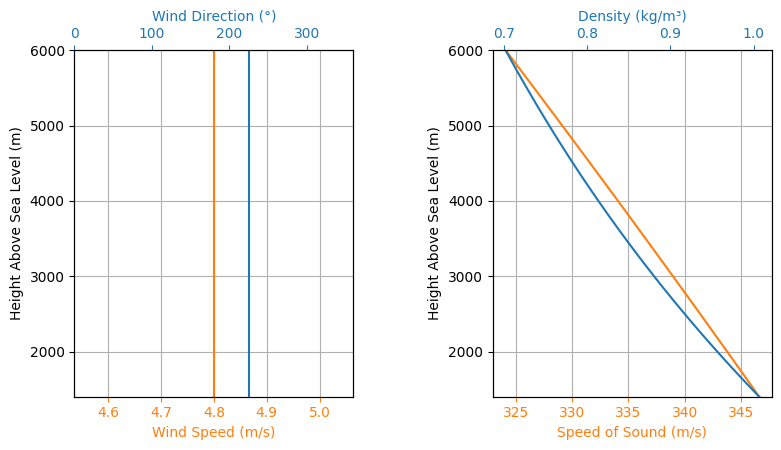

In [3]:
env.info()

In [4]:
from main import ROCKET_RADIUS

hyperion1 = Rocket(
    radius=ROCKET_RADIUS,
    mass=21,
    inertia=(
        4.87,
        4.87,
        0.05,
    ),
    power_off_drag=0.4,
    power_on_drag=0.4,
    center_of_mass_without_motor=0.9549,
    coordinate_system_orientation="tail_to_nose",
)

hyperion1.set_rail_buttons(0.69, 0.21, 60)

empty_motor = EmptyMotor()
hyperion1.add_motor(motor=empty_motor, position=0)
nose_cone = hyperion1.add_nose(length=0.742, kind="Von Karman", position=2.229)
fin_set = hyperion1.add_trapezoidal_fins(
    n=3,
    span=0.13,
    root_chord=0.268,
    tip_chord=0.136,
    position=0.273,
    sweep_length=0.066,
)


Inertia Details

Rocket Mass: 21.000 kg (without motor)
Rocket Dry Mass: 21.000 kg (with unloaded motor)
Rocket Loaded Mass: 21.000 kg
Rocket Structural Mass Ratio: 1.000
Rocket Inertia (with unloaded motor) 11: 4.870 kg*m2
Rocket Inertia (with unloaded motor) 22: 4.870 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.050 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.07135 m
Rocket Frontal Area: 0.015993 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.000 m
Rocket Center of Dry Mass - Nozzle Exit: 0.955 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.955 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.000 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 6.161/rad

Center of Pressure

No

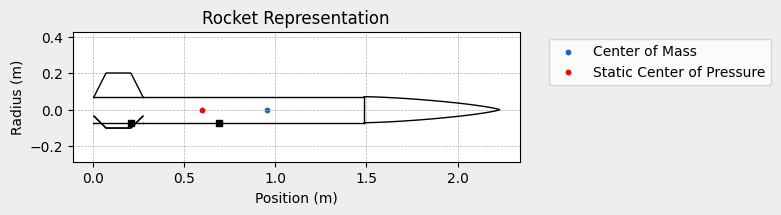

In [5]:
hyperion1.info()
hyperion1.draw()

## Simulate the Flight

In [6]:
vz_burnout = 255
from main import BURNOUT_VX_PROPORTION_OF_V, BURNOUT_VY_PROPORTION_OF_V, BURNOUT_V_Z_PROPORTION_OF_V, BURNOUT_ORIENTATION, BURNOUT_ANGULAR_VELOCITY

initial_solution=[
        0,
        0, 0, 384.86 + 1401,
        vz_burnout/BURNOUT_V_Z_PROPORTION_OF_V*BURNOUT_VX_PROPORTION_OF_V, vz_burnout/BURNOUT_V_Z_PROPORTION_OF_V*BURNOUT_VY_PROPORTION_OF_V, vz_burnout,
        BURNOUT_ORIENTATION[0], BURNOUT_ORIENTATION[1], BURNOUT_ORIENTATION[2], BURNOUT_ORIENTATION[3],
        BURNOUT_ANGULAR_VELOCITY[0], BURNOUT_ANGULAR_VELOCITY[1], BURNOUT_ANGULAR_VELOCITY[2]
    ]


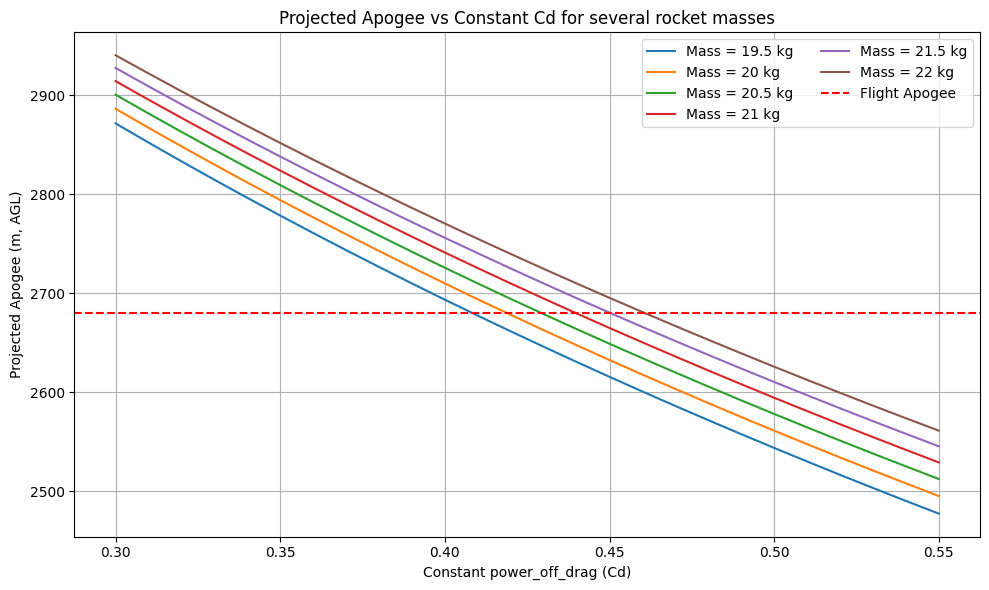

In [ ]:
# Sweep constant power_off_drag (Cd) values and record projected apogees for multiple masses
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from rocketpy import Function

# Cd range to test
cds = np.arange(0.3, 0.5501, 0.01)
# Masses to test (kg) (final massing of rocket didn't happen due to rushed final assembly at competition)
masses = [19.5, 20, 20.5, 21, 21.5, 22]

# test
results = {m: [] for m in masses}

# Reuse the initial_solution from the flight data
for mass in masses:
    for cd in cds:
        r_cd = Rocket(
            radius=ROCKET_RADIUS,
            mass=mass,
            inertia=(4.87, 4.87, 0.05),
            power_off_drag=cd,
            power_on_drag=cd,
            center_of_mass_without_motor=0.9549,
        )

        try:
            fl_cd = Flight(
                rocket=r_cd,
                environment=env,
                inclination=86.8,
                heading=167,
                rail_length=5.18,
                initial_solution=initial_solution,
                terminate_on_apogee=True,
            )
            ap_agl = fl_cd.apogee - env.elevation
            results[mass].append(ap_agl)
        except Exception as exc:
            print(f"Simulation failed for mass={mass} Cd={cd:.2f}: {exc}")
            results[mass].append(np.nan)

# apogee from the flight (for reference)
flight_apogee = 2680

# Plot results: one curve per mass
plt.figure(figsize=(10, 6))
for mass in masses:
    plt.plot(cds, results[mass], label=f'Mass = {mass} kg')
# add horizontal line at flight_apogee
plt.axhline(y=flight_apogee, color='r', linestyle='--', label='Flight Apogee')
plt.xlabel('Constant power_off_drag (Cd)')
plt.ylabel('Projected Apogee (m, AGL)')
plt.title('Projected Apogee vs Constant Cd for several rocket masses')
plt.grid(True)
plt.legend(ncol=2)
plt.tight_layout()
plt.show()